# 1. 데이터 불러오기 및 라이브러리 설치

In [1]:
## 라이브러리 설치

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import colour
from colour import Color
import missingno as msno
import json
import geopandas as gpd
import folium

import json
import geopandas as gpd
import folium

import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [2]:
## 데이터 불러오기

cluster=pd.read_csv('C://Users//User//Desktop//final_1031_data.csv', encoding='cp949') 

In [3]:
## 필요없는 변수 제거하기

del cluster['Unnamed: 0.1']
del cluster['Unnamed: 0']
del cluster['전기차비율_s'] 
del cluster['온실가스비율_s']
del cluster['전기차관심도_s']

In [4]:
## 변수 이름 변경하기

cluster.columns = ['행정동코드', '시군구명', '행정동', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격', '면적',
       '평균총소득', '충전소개수', '전기차개수', '차한대당충전소대수', '전체차량개수', '전기차보급률', '전기사용량',
       '온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm', '주유소개수',
       '충전소인프라', '급속', '완속', '주유소접근성']

## 변수 순서 변경하기

cols = ['행정동코드', '시군구명', '행정동', '면적', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격',
       '평균총소득', '전체차량개수', '전기차개수','전기차보급률','충전소개수', '급속', '완속',
        '차한대당충전소대수','충전소인프라','주유소개수', '주유소접근성', '전기사용량','온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm']

cluster = cluster[cols]

# 2. Corrplot 그리기

In [5]:
data_cor  = cluster.copy()

In [6]:
data_cor = data_cor .drop(['행정동코드','시군구명','행정동','kmeans','kmedoids','hc','gmm'],axis=1)

In [7]:
data_cor.head(1)

,면적,인구밀도,거주인구,거주비율,생활인구,생활인구성격,평균총소득,전체차량개수,전기차개수,전기차보급률,충전소개수,급속,완속,차한대당충전소대수,충전소인프라,주유소개수,주유소접근성,전기사용량,온실가스비율
0,1.34,20434.531886,27382.272727,0.286862,26330.90395,0.961604,1055.62,10234,229,0.022376,7,11,111,0.030568,0.030568,0,-9.344326,11781.489,0.412222


Text(0.5, 1.0, '변수별 상관관계 분석')

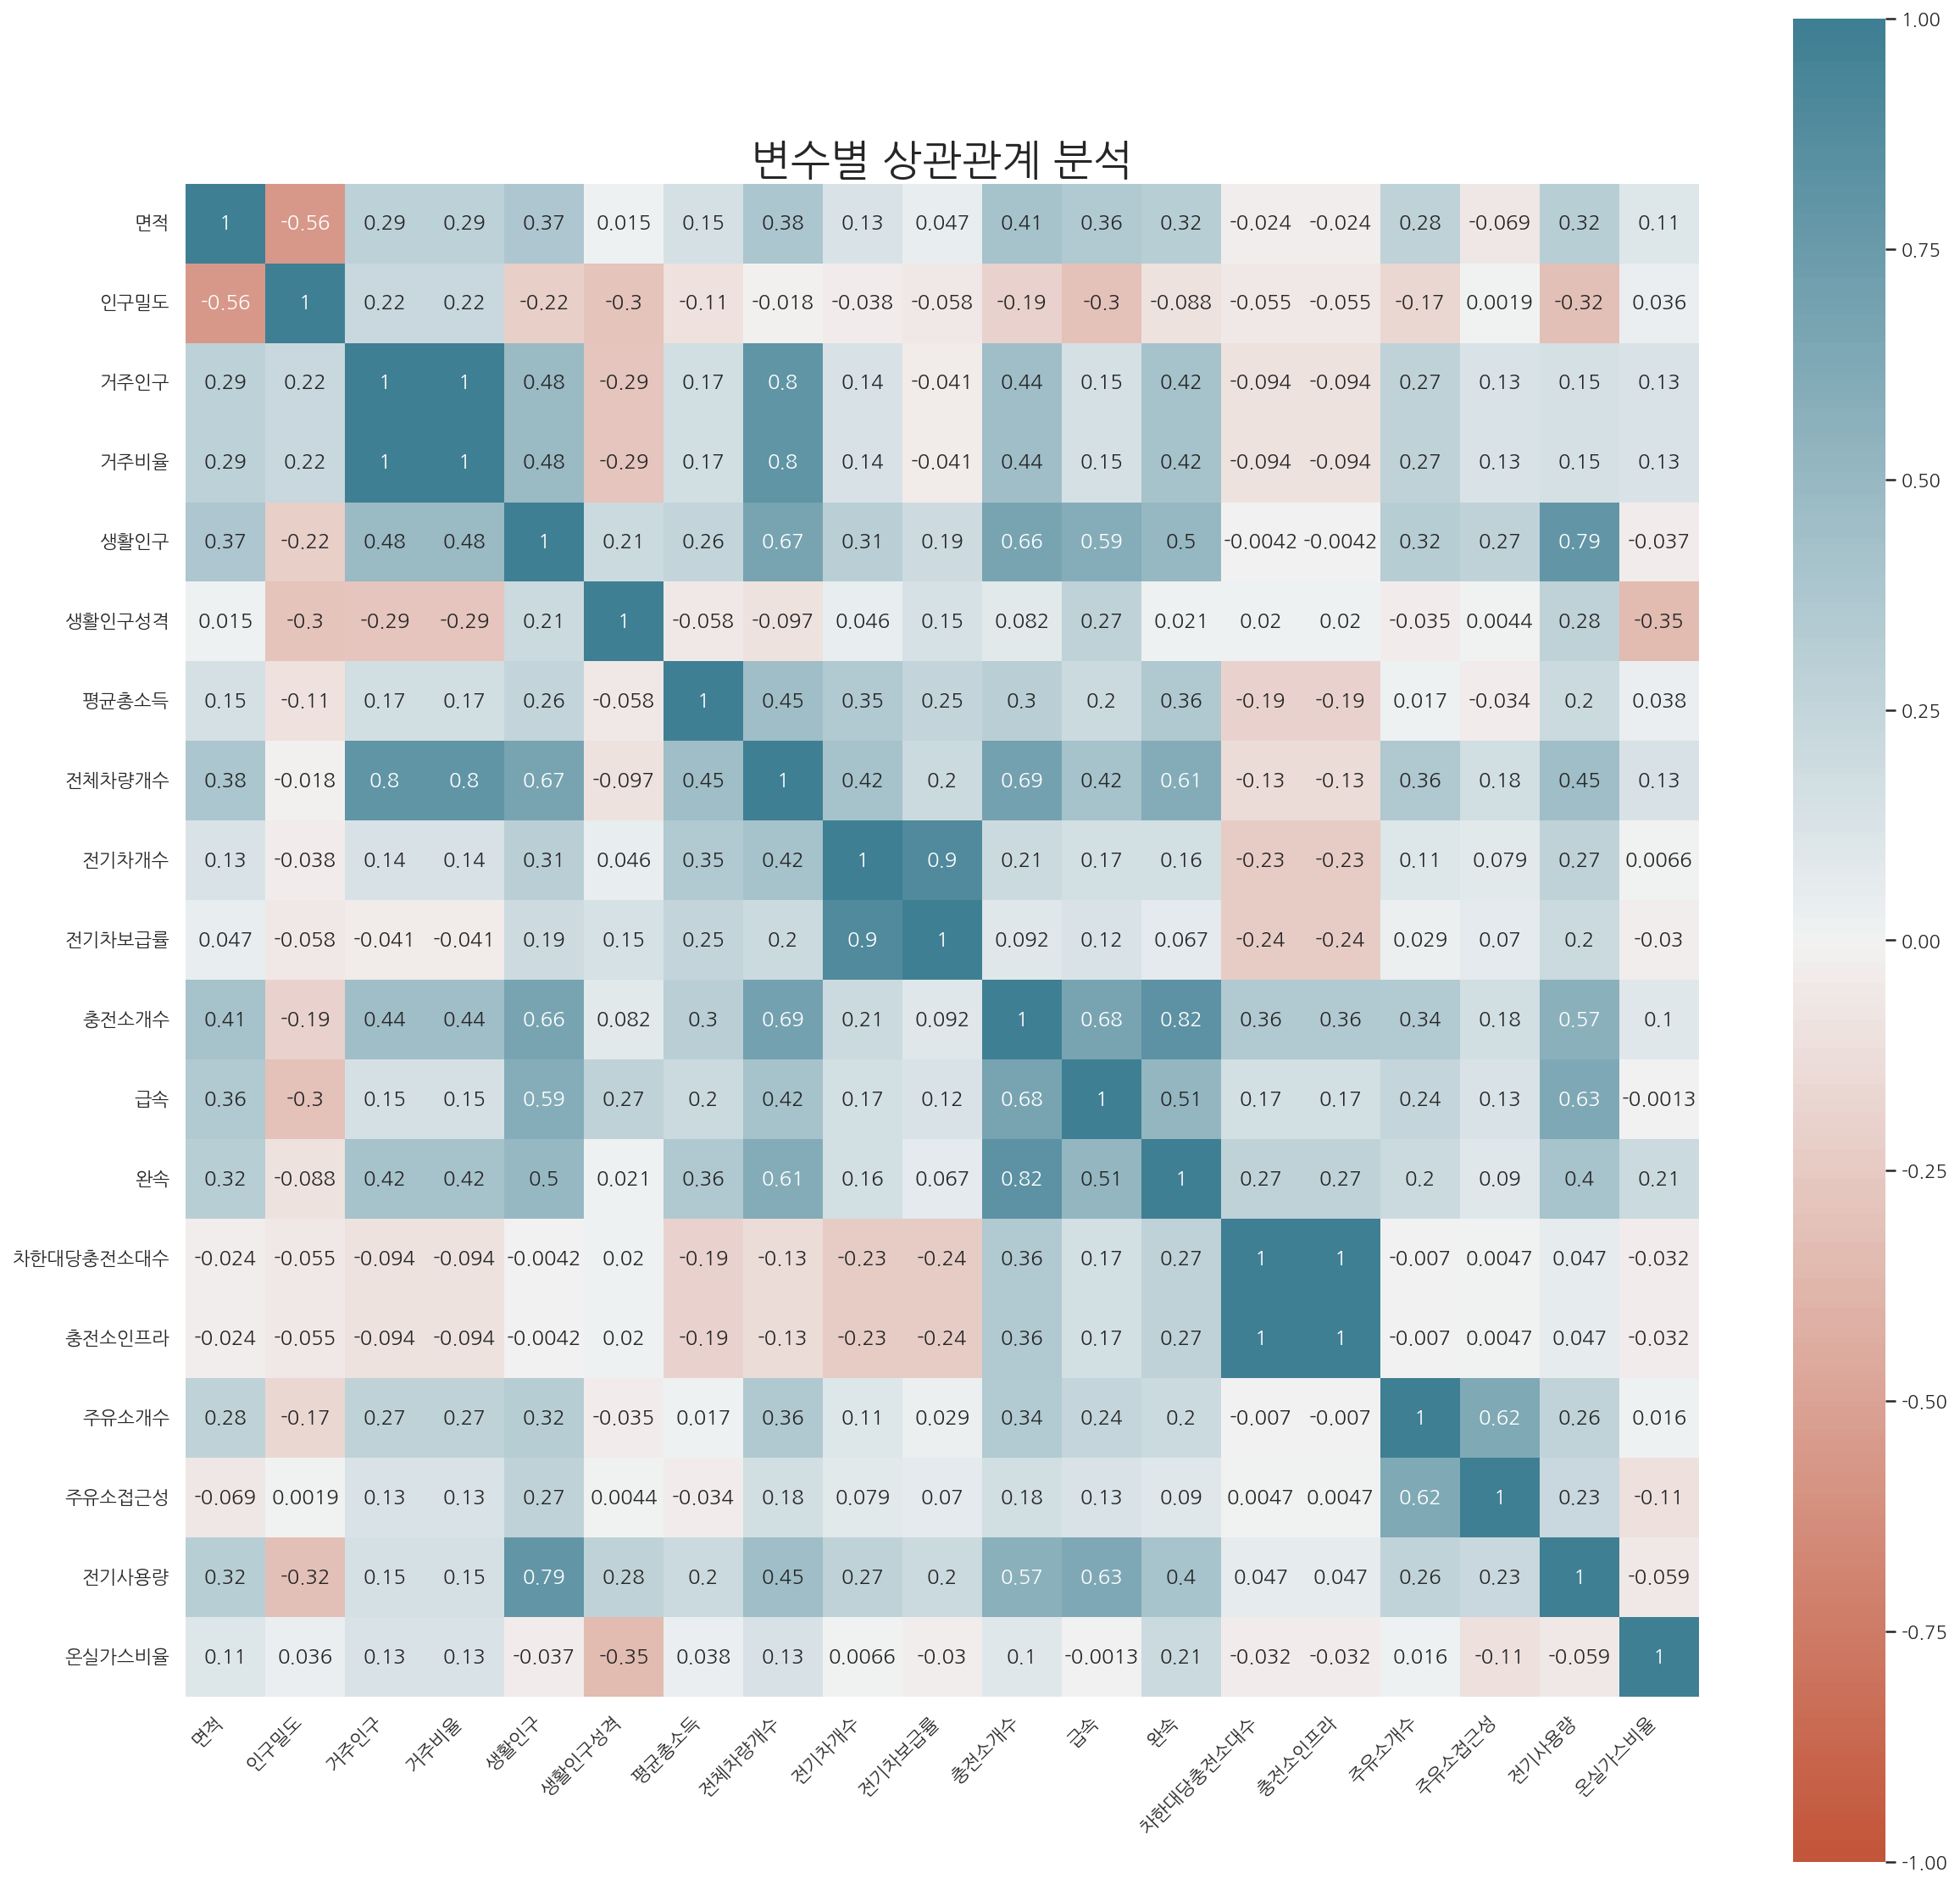

In [8]:
## Corrplot 그리기

corr = data_cor.corr()

plt.figure(figsize=(20,20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('변수별 상관관계 분석',fontsize=25)